In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Hamza
[nltk_data]     Akram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#Load the dataset
df = pd.read_csv(r"C:\Users\Hamza Akram\Desktop\ML Internship\Email Classification Dataset 1\email_spam.csv")
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [10]:
df.isnull().sum()

title    0
text     0
type     0
dtype: int64

In [11]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
79    False
80    False
81    False
82    False
83    False
Length: 84, dtype: bool

In [12]:
#Data cleaning and preprocessing (e.g., text preprocessing,tokenization)
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
# Function to clean the email text
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)    
    # Convert to lowercase
    text = text.lower()    
    # Tokenization
    words = text.split()  
    # Removal of stopwords and apply stemming
    words = [ps.stem(word) for word in words if word not in stop_words]    
    # Join the words back into a single string
    return ' '.join(words)
# Apply the preprocessing function to the text column
df['text'] = df['text'].apply(preprocess_text)

# Display the preprocessed text
print(df['text'].head())


0    hi jame claim complimentari gift yet compil sp...
1    alt text congratul earn complet follow offer v...
2    github launch code mortyj octocat stand next r...
3    hello thank contact virtual reward center virt...
4    hey prachanda rawal today newslett jam pack ev...
Name: text, dtype: object


In [15]:
#Feature extraction (e.g., TF-IDF)
tfidf = TfidfVectorizer(max_features=5000) 

X = tfidf.fit_transform(df['text']).toarray()

y = df['type'] 


In [16]:
#Model selection and training (e.g., Naive Bayes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()

model.fit(X_train, y_train)


MultinomialNB()

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

#Model evaluation and fine-tuning
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
print(classification_report(y_test, y_pred, zero_division=1))



Accuracy: 64.71%
Confusion Matrix:
[[11  0]
 [ 6  0]]
Classification Report:
              precision    recall  f1-score   support

    not spam       0.65      1.00      0.79        11
        spam       0.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.32      0.50      0.39        17
weighted avg       0.42      0.65      0.51        17

              precision    recall  f1-score   support

    not spam       0.65      1.00      0.79        11
        spam       1.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.82      0.50      0.39        17
weighted avg       0.77      0.65      0.51        17



C:\Users\Hamza Akram\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza Akram\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza Akram\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
#Model selection and training (e.g., SVM)
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")


SVM Accuracy: 70.59%


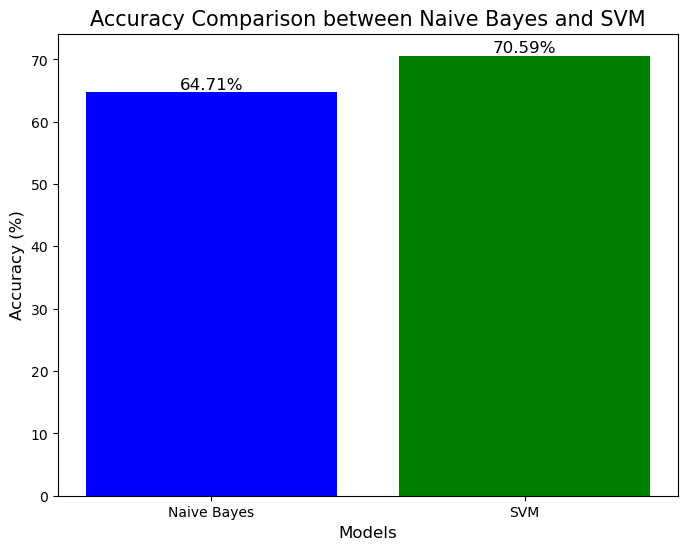

In [21]:
#Comparison Between Naive Bayes and SVM
models = ['Naive Bayes', 'SVM']
accuracies = [accuracy * 100, accuracy_svm * 100]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])

plt.title('Accuracy Comparison between Naive Bayes and SVM', fontsize=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.5, f'{accuracy:.2f}%', ha='center', fontsize=12)

plt.show()
